<a href="https://colab.research.google.com/github/lapa19/DL_basics/blob/main/Makemore_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open('/content/drive/MyDrive/Colab Notebooks/names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(stoi)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}


In [ ]:
block_size = 3
X, Y = [], []
for w in words:
  context = [0]*block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    context = context[1:] + [ix]
X = torch.tensor(X)
Y = torch.tensor(Y)

In [60]:
def build_dataset(words):
  block_size = 3
  X, Y = [], []
  for w in words:
    context = [0]*block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix]
  X = torch.tensor(X)
  Y = torch.tensor(Y)
  return X,Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

In [26]:
n1

25626

In [72]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10), generator=g)
W1 = torch.randn(30,200)
b1 = torch.randn(200)
W2 = torch.randn((200,27))
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]
for p in parameters:
  p.requires_grad = True


In [73]:
lre = torch.linspace(-3,0,1000)
lrs = 10**lre

In [74]:
lri = []
lossi = []
stepi = []

In [80]:
for i in range(50000):
  ix = torch.randint(0,Xtr.shape[0],(32,))
  emb = C[Xtr[ix]]
  #torch.cat([emb[:,0,:], emb[:,1,:], emb[:,2,:]], 1)
  #torch.cat(torch.unbind(emb, 1), 1)
  h = torch.tanh(emb.view(emb.shape[0],30) @ W1 + b1)
  logits = h @ W2 + b2
  logits.shape
  # counts = logits.exp()
  # prob = counts / counts.sum(1, keepdims=True)
  # loss = -prob[torch.arange(32), Y].log().mean()
  loss = F.cross_entropy(logits, Ytr[ix])
  for p in parameters:
    p.grad = None
  loss.backward()
  # lr = lrs[i]
  for p in parameters:
    p.data += -0.01 * p.grad
  # lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())
print(loss.item())

2.0717103481292725


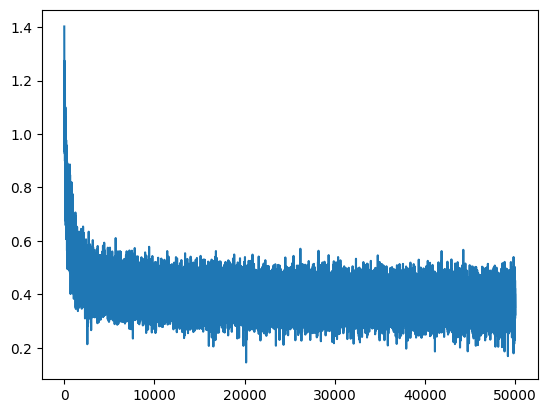

In [76]:
plt.plot(stepi, lossi)

In [81]:
emb = C[Xdev]
h = torch.tanh(emb.view(emb.shape[0],30) @ W1 + b1)
logits = h @ W2 + b2
logits.shape
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.2133, grad_fn=<NllLossBackward0>)

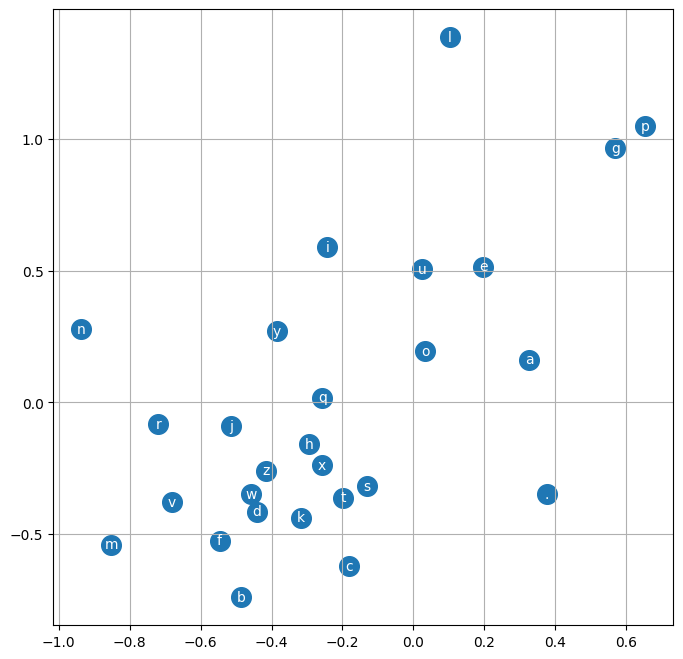

In [54]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s = 200)
for i in range(C.shape[0]):
  plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
plt.grid('minor')

In [82]:
g = torch.Generator().manual_seed(2147483647 + 10)
block_size = 3
for _ in range(20):
  out = []
  context = [0]*block_size
  while True:
    emb = C[torch.tensor([context])]
    h = torch.tanh(emb.view(1, -1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0:
      break
  print(''.join(itos[i] for i in out))

mora.
kayah.
see.
med.
ryal.
rethan.
endradi.
azeredieliigh.
parelle.
eliestanar.
kayzion.
kalin.
shabergiagriel.
kinde.
jelipenterori.
brey.
dariyah.
faeh.
yuma.
maston.
